# 9. Sentiment(감정 분석)
 - 단어별로 잘라서는 알수 없는 부분을 감정분석을 통해 확인 할 수 있다. 
 - 리뷰 -> 별점 
  - 회귀 : 연속
  - 분류 : 이산 (긍 / 부정)

## 9.1 감정분석 방법
 - 사전 기반.
  - 긍정단어 사전 / 부정단어 사전을 미리 만들어놓고 하는 것.
  - ex ) 깨끗, 오래간다. / 외모에서 청순하다. 좋은 뜻이지만 뇌가 청순해 하면 부정적인 단어가 된다. 
  - 각 분야에 대해서 사전을 미리 만들어놔야한다. 
 - 기계학습 기간.
  - 텍스트를 다 넣고 예측을 하게 하는 방법.
  - 데이터의 리뷰와 별점과 같이 Input / Output이 모두 존재해야한다. 
  - 보통 Output 데이터가 없다.
 
## 9.2 선형회귀분석을 이용한 사전 개발
 - 회귀계수 > 0 : 긍정단어
 - 회귀계수 < 0 : 부정단어
 - 문제점 : 단어 수가 많음.
  - 회귀계수가 미친듯이 널뛰는 현상이 있다. 왔다 갔다 한다. 해당 부분들이 너무 많아져서 해석이 어려움이 생긴다. 

## 9.3 과적합 overfitting
 - 데이터를 지나치게 많이 설명하는 것
 - 데이터 = 패턴 + 잡음
 - 새로운 데이터를 잘 설명하지 못하게 됨
 - 복잡한 모형일 수록 과적합이 잘 일어남


In [1]:
from IPython.display import Image

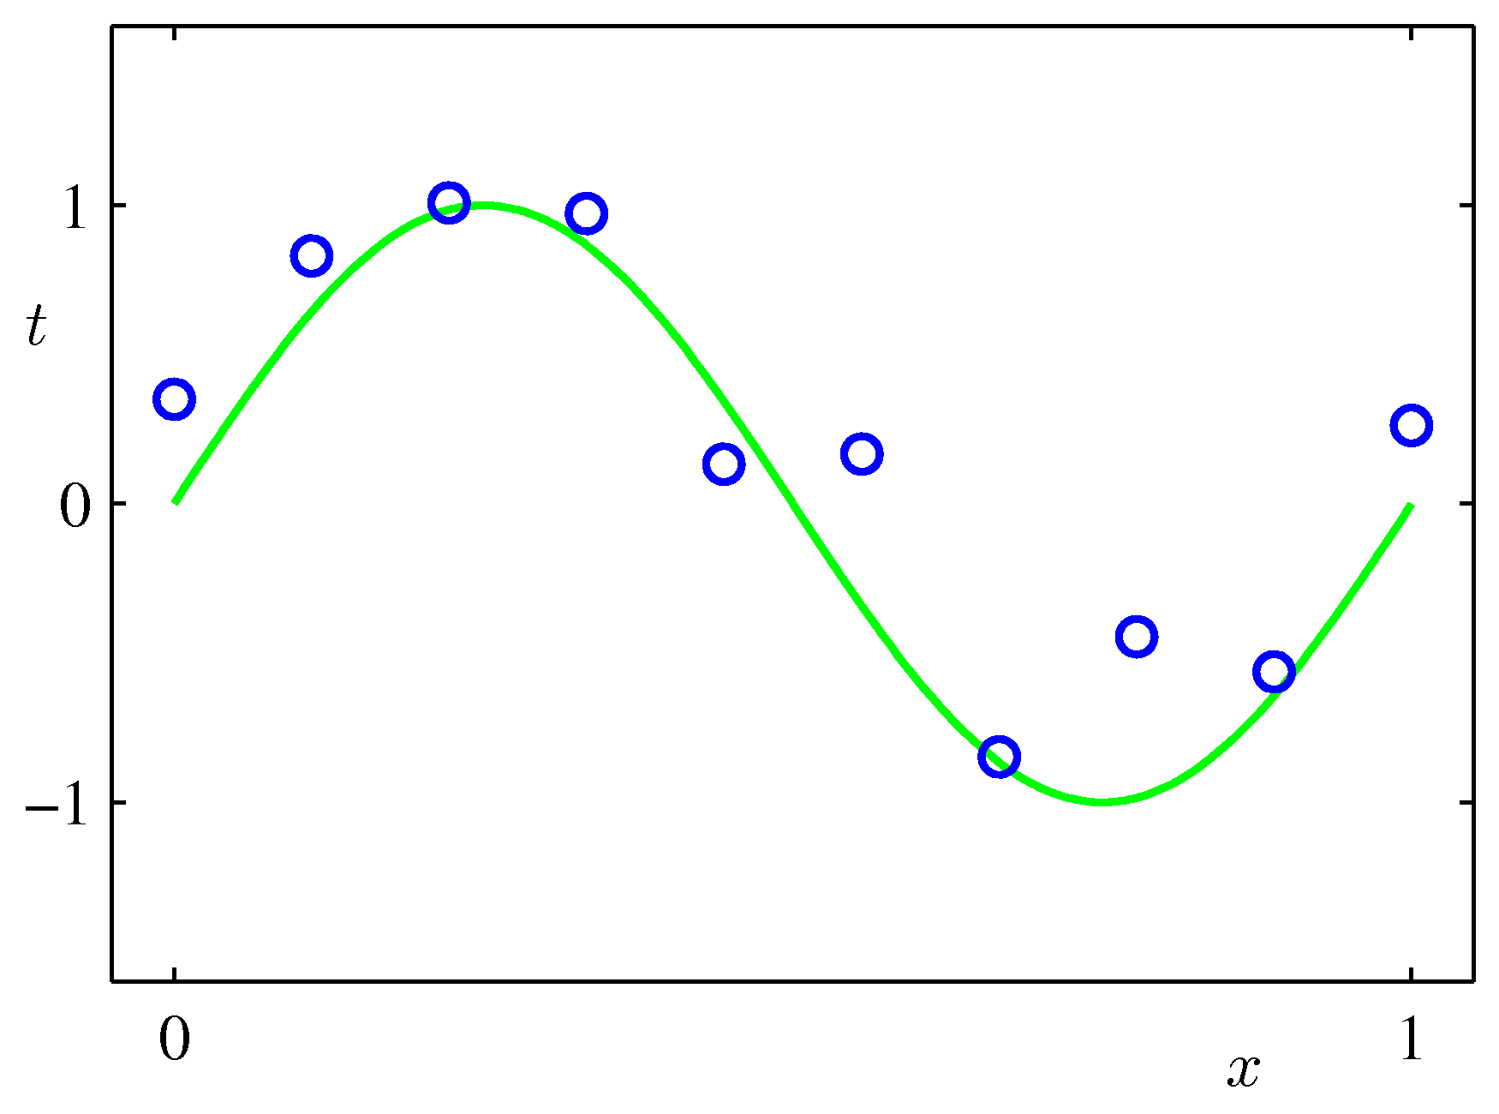

In [2]:
Image(filename="img/5.PNG", width=400)

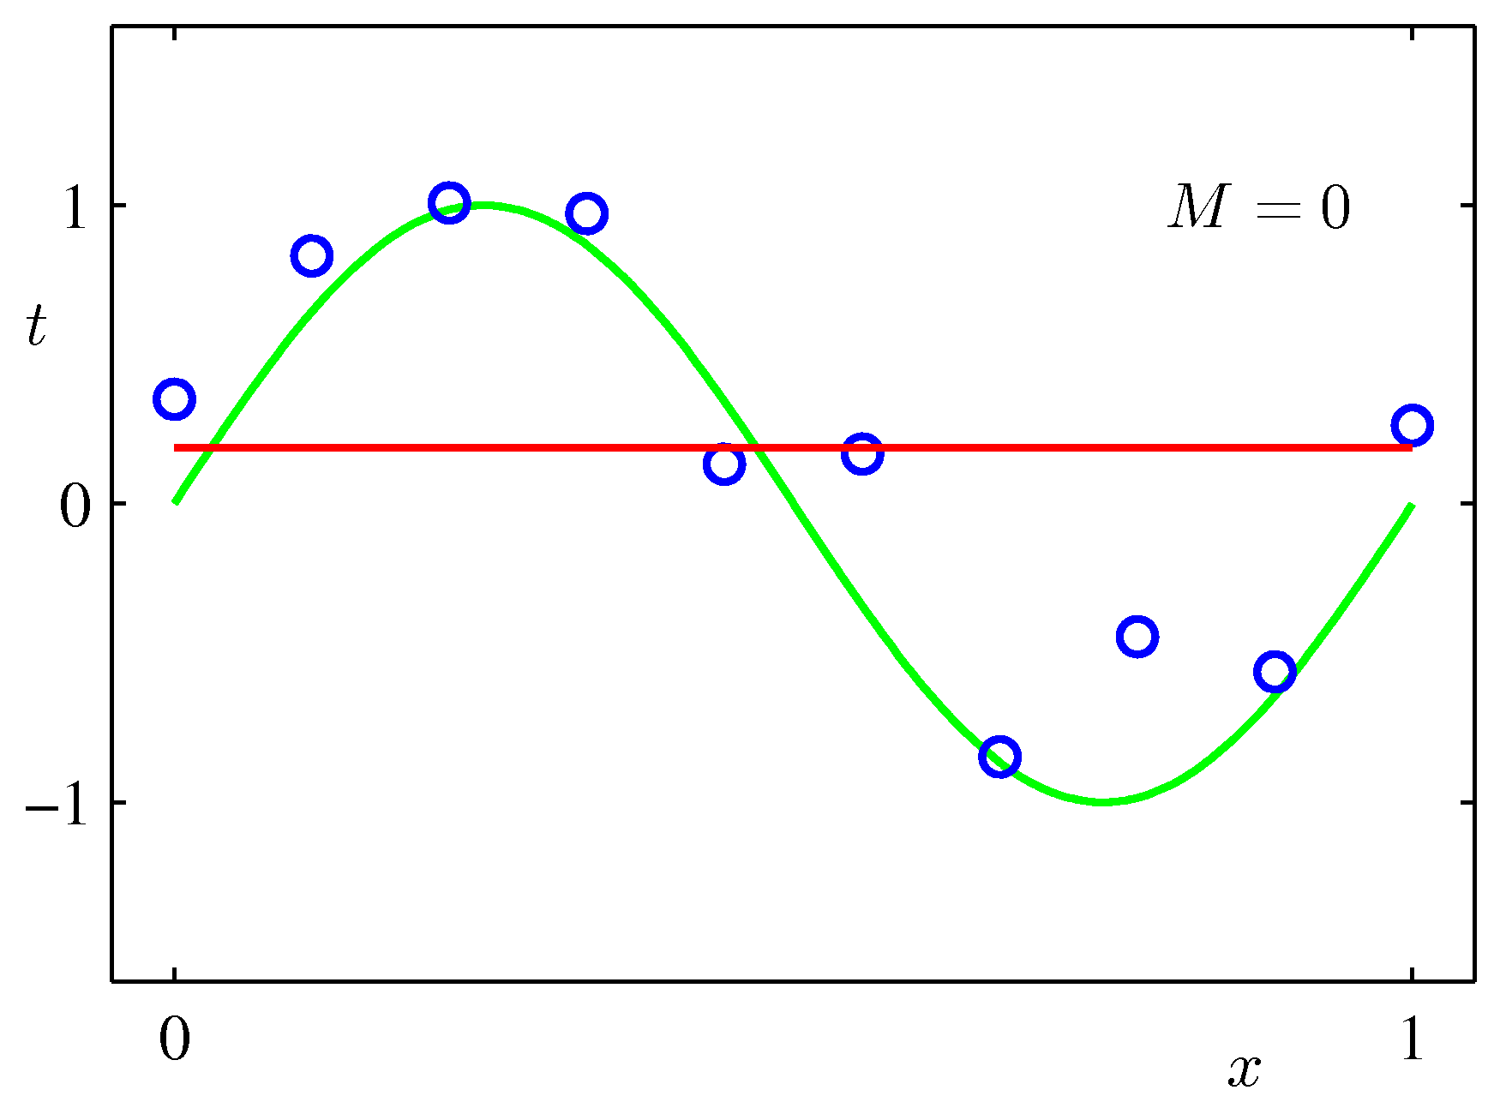

In [3]:
Image(filename="img/6.PNG", width=400)

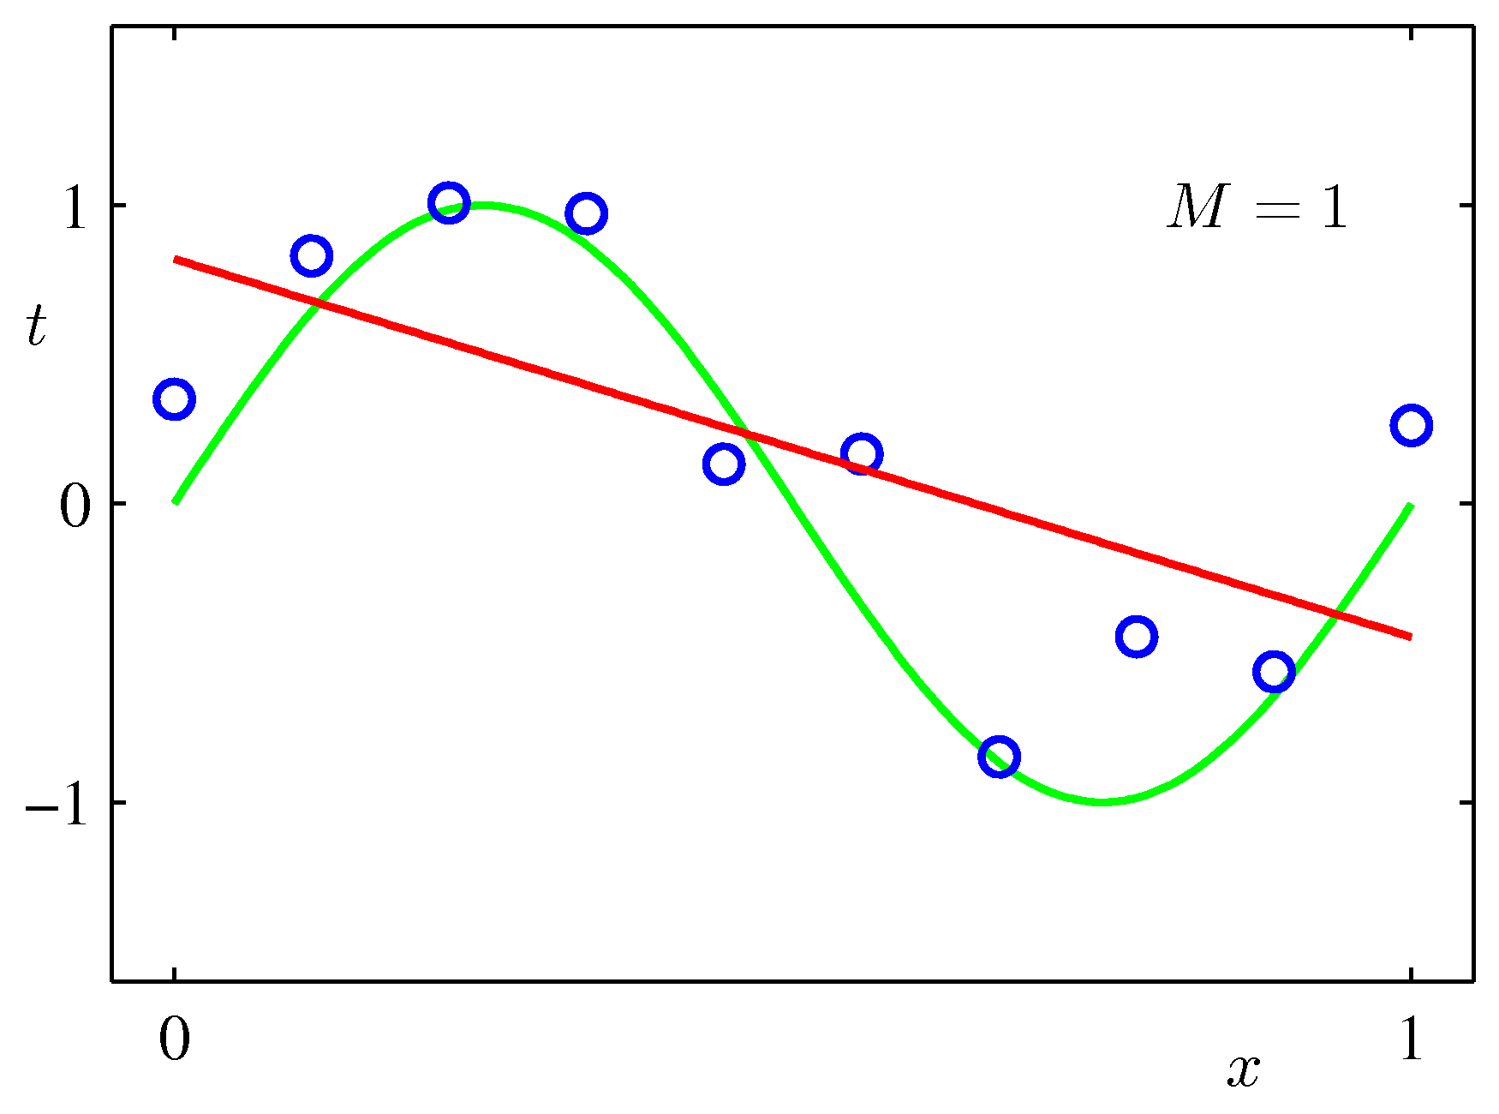

In [4]:
Image(filename="img/7.PNG", width=400)

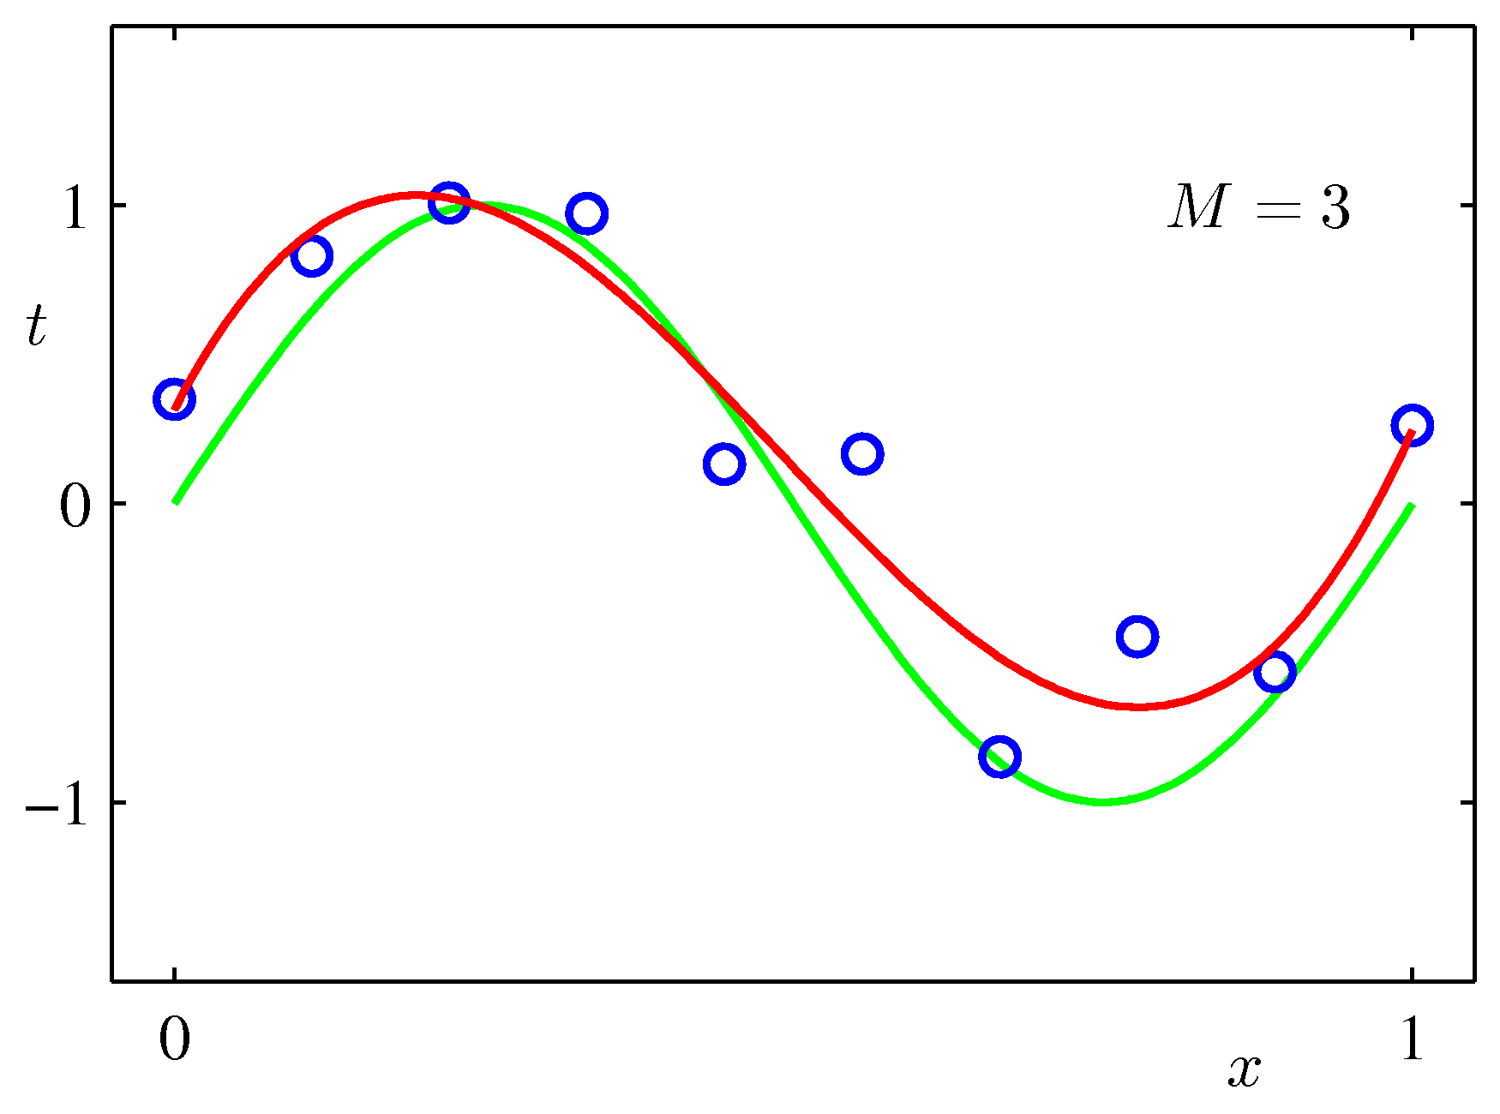

In [5]:
Image(filename="img/8.PNG", width=400)

 - 데이터에 있는 noise를 모두 캡쳐를 해서 왔다갔다. 한다. 차원이 높아진다. 새로운 데이터에 대해서 오차가 높아진다.

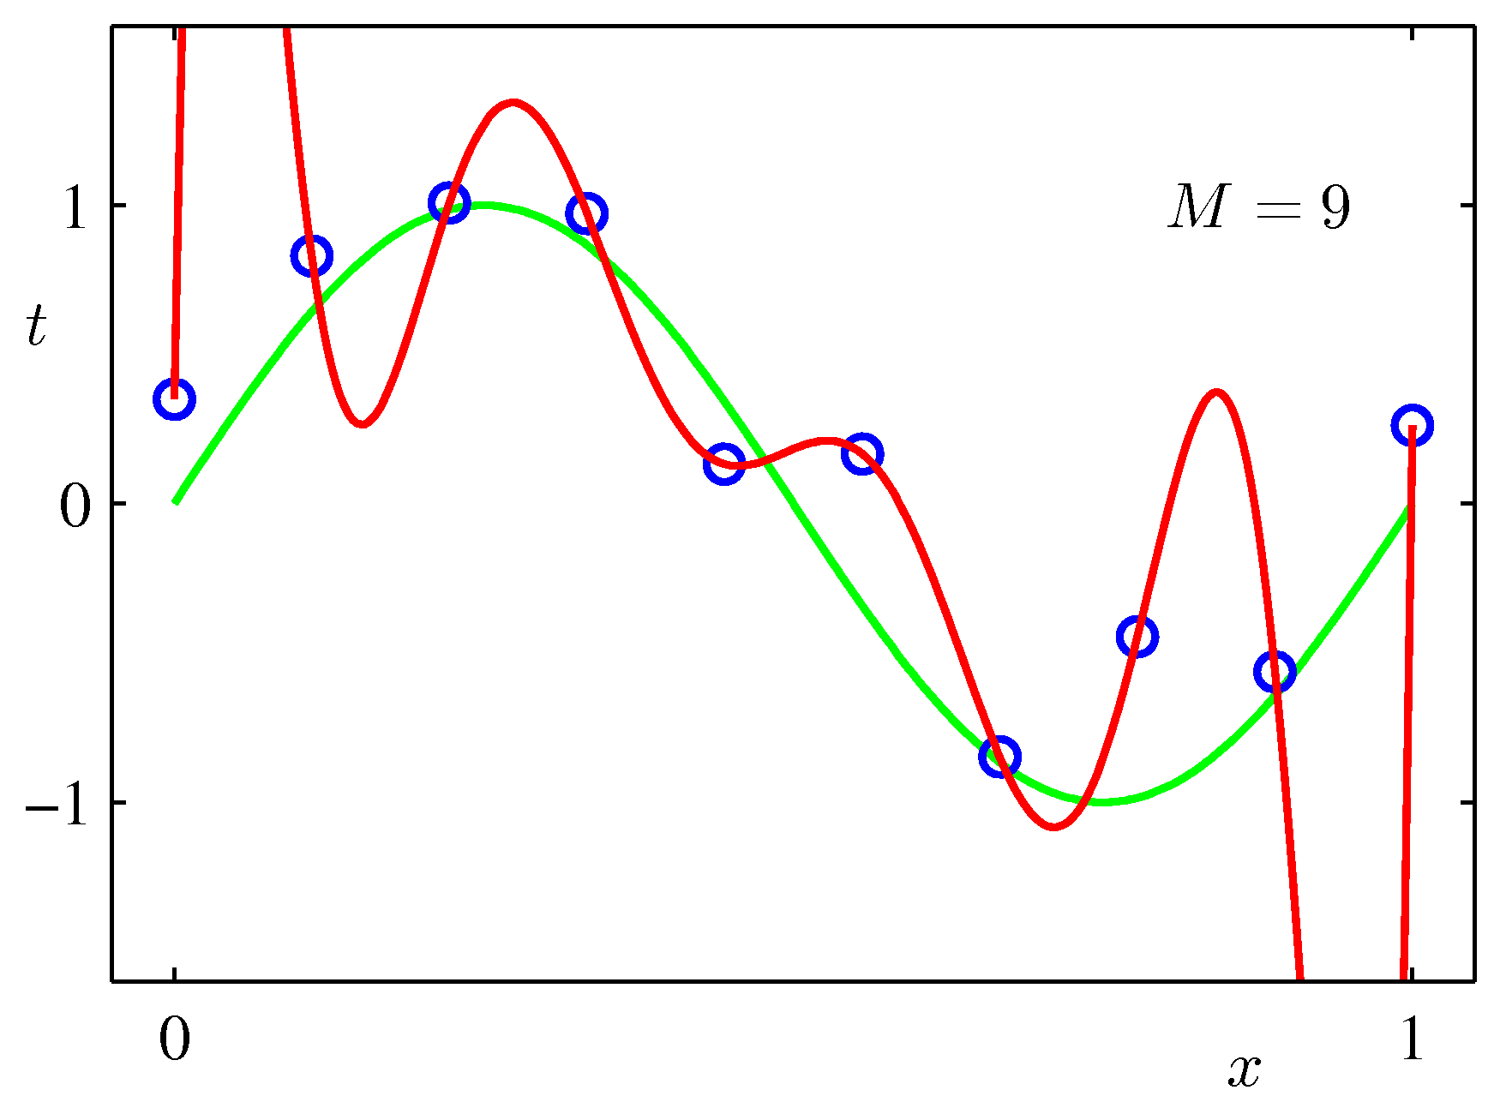

In [6]:
Image(filename="img/9.PNG", width=400) 

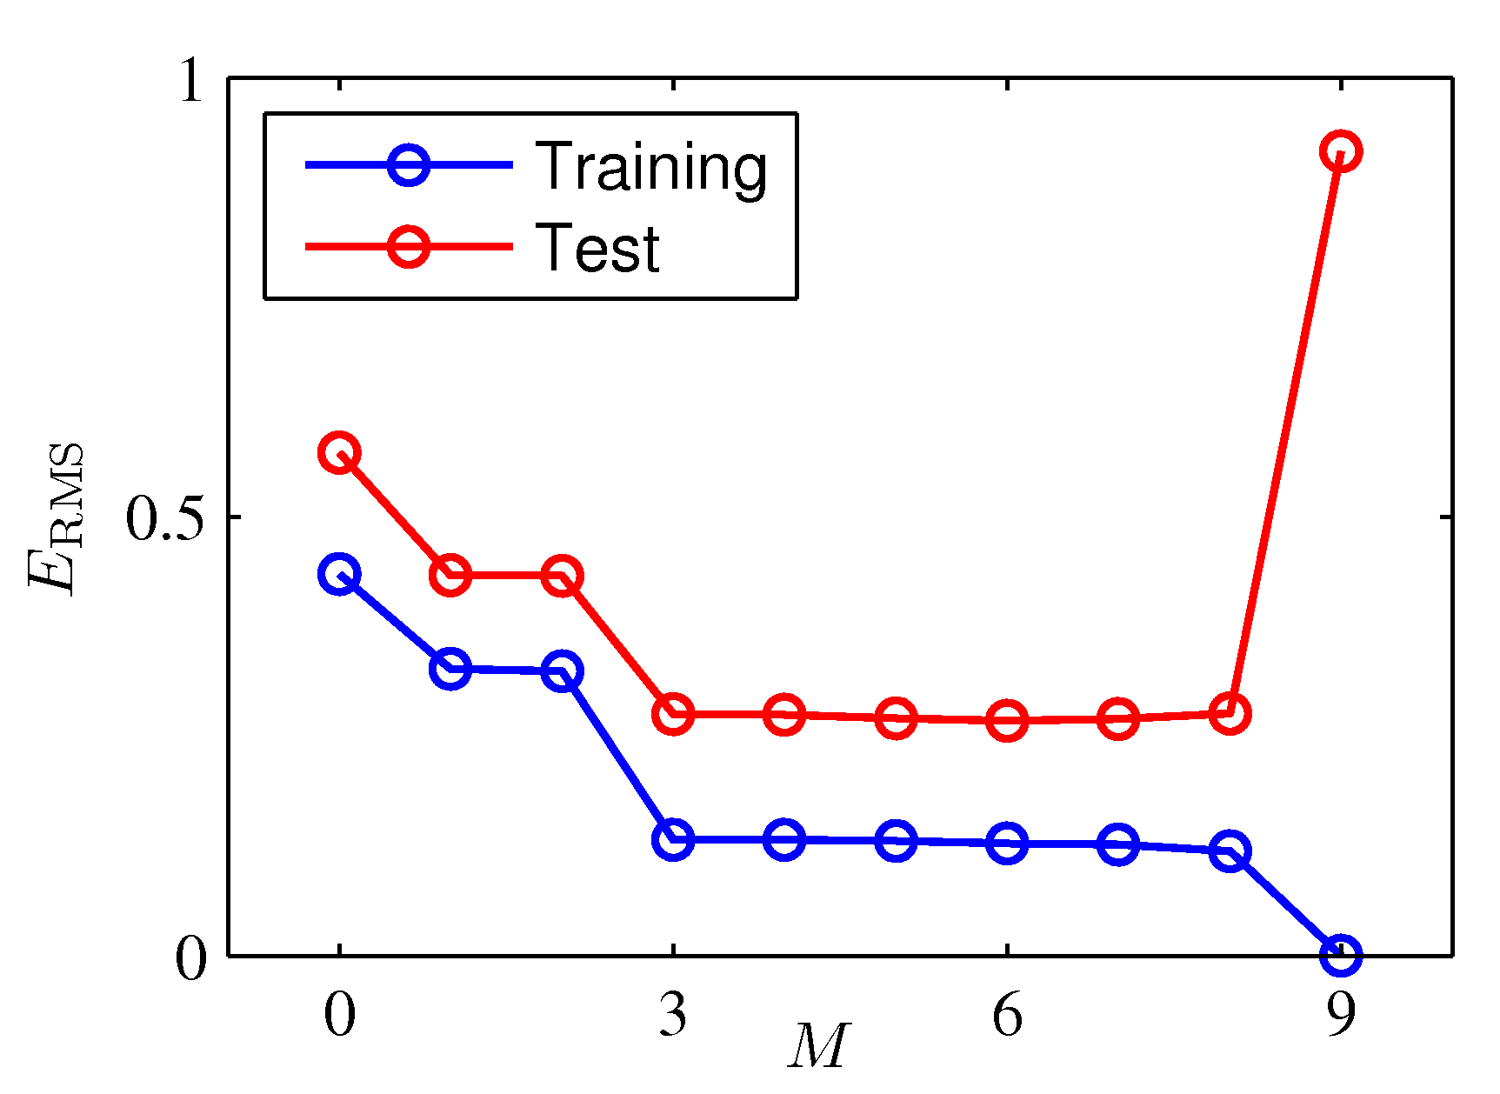

In [7]:
Image(filename="img/10.PNG", width=400) # 가로 모형의 복잡도 세로 : 에러.
# 모형이 복잡해 지면 TEST Data Set 에 대해서 Error가 높아진다. 

## 9.4 텍스트 분석에서 과적합 
 - 텍스트 분석에서 단어 = 변수
 - 단어 많음 -> 변수 많음 -> 모형 복잡
 - 1000개의 단어를 뽑았다면 특수성이 있는 단어의 경우나 특정 배우가 말했던 대사의 경우는 제거 하고 단어 사전을 만든다. => 100개정도만 뽑아서 

## 9.5 정규화 Regularization, Penalization
 - 오차 = 실제값 – 예측값
 - OLS는 (오차^2)만을 최소화
 - 정규화는 (오차^2 + 정규화 항)을 최소화 => 정규화항은 모형의 복잡도를 반영한 항. 
 - $Lasso (L1)$
  - 회귀계수의 절댓값의 합 : 기울기의 절대값 합. 
  - 단어마다 회귀계수가 있다. 거기에 절대값을 해서 다 더한다. (정규화항) 
  - 즉, 오차의 제곱 + Lasso값이 최소화되도록
  - 위의 그림의 9차 형태의 그래프는 절대값으로 하게 되면 값이 커지게 되므로 차수가 적은 그래프를 선택 할 수가 있다.
  - 회귀계수를 0으로 만드는 성향이 있다.
 - $Ridge (L2)$
  - 회귀계수의 제곱의 합
  - 분석에서 단어자체를 뺄 수가 있다. 
  - 회귀계수를 적게 만들어준다. 
  - 대체로 새로운 데이터의 예측력이 좋음

 - 어느 쪽이나 회귀계수가 작아짐
 - 극단적인 예측이 줄어듦
 - $Elastic \ Net$ 
  - 오차2 + Lasso + Ridge
  - 위의 둘다 모두 사용.


## 9.6 선형모형의 장점과 한계 
 - 예측만 더 잘하고 싶다면 다른 모형 사용
  - SVM
  - Random Forest
  - XGBoost
  - DeepLearning

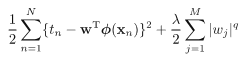

In [8]:
Image(filename="img/11.PNG", width=300)

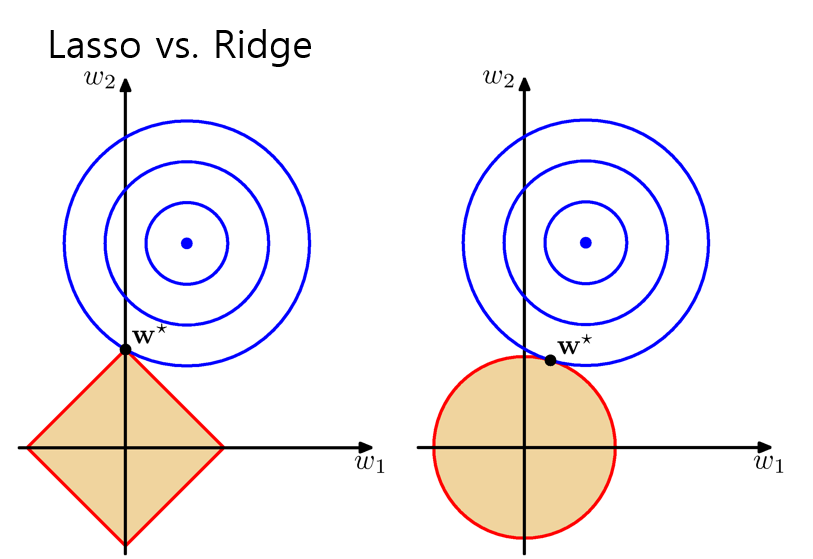

In [9]:
Image(filename="img/12.PNG", width=500)

## (실습)네이버 영화평 

In [10]:
import requests
import lxml.html

In [11]:
#리뷰 모음 
reviews = []

url = 'http://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=121051&type=after&onlyActualPointYn=Y&page={}'

In [12]:
import tqdm

In [13]:
for page in tqdm.tqdm_notebook(range(1,200)): # 나중에 숫자 바꿔서하면된다.
    res = requests.get(url.format(page))
    element = lxml.html.fromstring(res.text)
    for e in element.xpath('.//div[@class="score_result"]//li'):
        star = e.find('.//div[@class="star_score"]//em').text_content()
        comment = e.find('.//div[@class="score_reple"]//p').text_content()
        reviews.append([star, comment[3:]])

In [14]:
len(reviews)

1990

## csv 파일로 저장. 

In [4]:
import csv

In [16]:
with open("data/movie/naver_review.csv","w", encoding='utf8') as f:
    w = csv.writer(f)
    w.writerow(['star','comment'])
    w.writerow(reviews)

## Term-Document Matrix

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Twitter

In [18]:
tagger = Twitter()

In [19]:
def get_word(text):
    nouns = tagger.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]

In [20]:
cv = CountVectorizer(tokenizer=get_word, max_features=1000)

In [22]:
tdm = cv.fit_transform([r[1] for r in reviews])

In [23]:
tdm

<1990x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 7683 stored elements in Compressed Sparse Row format>

In [24]:
noun_list = cv.get_feature_names()

In [25]:
str(noun_list[:10])

"['가능', '가득', '가면', '가안', '가장', '가족', '가지', '각자', '간다', '간만']"

## 저장

In [2]:
import numpy as np 

In [27]:
np.save('data/movie/tdm.npy',tdm)

In [28]:
with open('data/movie/nouns.txt','w',encoding='utf8') as f:
    f.write('\n'.join(noun_list))

## 데이터 불러오기 

In [5]:
with open('data/movie/naver_review.csv',encoding='utf8') as f:
    w = csv.reader(f)
    next(w)
    reviews = list(w)

In [6]:
len(reviews)

2495

### TDM

In [7]:
tdm = np.load('data/movie/tdm.npy').tolist()

In [8]:
tdm

<2495x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 9656 stored elements in Compressed Sparse Row format>

### 단어목록

In [9]:
with open('data/movie/nouns.txt', encoding='utf8') as f:
    noun_list = f.read().splitlines()

In [10]:
str(noun_list[:10])

"['가가', '가끔', '가나다', '가면', '가세', '가슴', '가안', '가장', '가족', '가지']"

## Training Set / Test Set 

In [11]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\envs\work\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
stars = [int(r[0]) for r in reviews]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tdm, stars, test_size=0.2, random_state=42)

### Linear Model 

In [15]:
from sklearn import linear_model

In [16]:
lm = linear_model.LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 결과보기 

In [18]:
len(lm.coef_)

1000

In [55]:
def get_import_words(model, positive=True, n=8):
    return sorted(list(zip(noun_list,model.coef_)), key=lambda x:x[1], reverse=positive)[:n]

In [56]:
get_import_words(lm) # 별점이 10점까지 밖에 없는데. 출연이 나올때마다 21점이 올라간다. 널뛰게 된다. => 정규화가 필요하다.

[('출연', 21.126844728702167),
 ('등장', 19.235301248022207),
 ('월광', 18.122941869896326),
 ('성도', 17.896878661970998),
 ('중심', 16.028102045516267),
 ('비교', 15.609075574584889),
 ('혼돈', 14.207378551063229),
 ('지릴뻔', 13.188020933476198)]

In [57]:
get_import_words(lm, positive=False)

[('정체', -27.125870048395033),
 ('회수', -23.62647440097561),
 ('퀄리티', -19.124022046387577),
 ('흐트러진', -18.696977871855381),
 ('차지', -16.799745890714462),
 ('사탄', -15.082065879486869),
 ('당신', -14.072208625108733),
 ('개도', -13.796561536032987)]

In [58]:
lm.score(X_train,y_train) # R의 제곱 : (전체분산 - 오차의 분산) / 전체 분산.

0.62483192618898542

In [59]:
lm.score(X_test,y_test) # 오차분산이 전체 분산보다 크다. 

-1.9796767908845136

### Lasso Regression
 - $error^2$ + 정규항 (회귀계수의 절대값 합)
 - alpha : 뒤에 정규항에 대해서 가중치를 줄 수 있다. $\lambda$라고 한다.
  - 가중치를 키울수록 단순한 모델을 좋아한다.
  - 가중치를 낮출수록 예측에 대해서 우선순위를 준다. 

In [60]:
lasso = linear_model.Lasso(alpha=0.01) # 일일이 넣어보고 좋은걸로한다. 

In [61]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
get_import_words(lasso)

[('현혹', 0.88713581696690991),
 ('소름', 0.84968514539862283),
 ('한국', 0.70021990178298676),
 ('완전', 0.67825442406668324),
 ('최고', 0.60862345479841662),
 ('한번', 0.60141433009348277),
 ('대박', 0.58340521981655247),
 ('나홍진', 0.54710065882888215)]

In [63]:
get_import_words(lasso, positive=False)

[('쓰레기', -3.0157856495097417),
 ('최악', -2.8314911049859814),
 ('실망', -2.3545628264857945),
 ('진심', -2.1289169617709827),
 ('별로', -2.1019194392410894),
 ('평론가', -1.6022189468578882),
 ('스트레스', -1.5782762715387715),
 ('노잼', -1.4914868801606267)]

In [80]:
lasso.score(X_train,y_train) 
# R^2의 값이 확떨어졌지만 테스트로 보면 많이 떨어지지 않았다. => 주어진 데이터에 대한 설명은 떨어지지만 예측은 높아진다. 

0.22711072765475204

In [67]:
lasso.score(X_test,y_test)

0.16421563673695438

### Ridge Regression

In [69]:
ridge = linear_model.Ridge(alpha=10)

In [70]:
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
get_import_words(ridge)

[('현혹', 1.0601106881706446),
 ('꿀잼', 1.0443313675327119),
 ('한국', 1.0182510842596877),
 ('완전', 0.92811850588499401),
 ('대박', 0.90239478957684649),
 ('소름', 0.87908820983225788),
 ('상영', 0.85846802746671724),
 ('오랜만', 0.78748292292507693)]

In [72]:
get_import_words(ridge, positive=False)

[('최악', -2.1852851590840241),
 ('쓰레기', -2.1787481007967382),
 ('별로', -2.0453313433106612),
 ('실망', -1.9441862220670005),
 ('진심', -1.7675346570877519),
 ('노잼', -1.6412789836645458),
 ('스트레스', -1.6058543170572588),
 ('평론가', -1.540515195257488)]

### LassoCV

In [73]:
lassocv = linear_model.LassoCV()

In [74]:
lassocv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [75]:
lassocv.alpha_

0.0044042722467688596

In [78]:
get_import_words(lassocv)

[('현혹', 1.1542006907606654),
 ('꿀잼', 1.0870515552945328),
 ('한국', 1.0249185904484286),
 ('완전', 0.98426458718318577),
 ('대박', 0.92037409166312578),
 ('소름', 0.87429295078965152),
 ('상영', 0.73455912085431208),
 ('오랜만', 0.70759770353490214)]

In [79]:
get_import_words(lassocv, positive=False)

[('쓰레기', -4.3859818525450258),
 ('최악', -3.715644334789411),
 ('예수', -3.5464908051029314),
 ('진심', -2.9211490020643791),
 ('실망', -2.8420014535860054),
 ('평론가', -2.7031547321076626),
 ('점도', -2.6163250357422703),
 ('페이', -2.3182003406731408)]

In [86]:
lassocv.score(X_train,y_train)

0.32831600665376703

In [87]:
lassocv.score(X_test,y_test)

0.16900825071460457

### RidgeCV

In [81]:
ridgecv = linear_model.RidgeCV(alphas=[.001, .01, .1, 1, 10, 100])

In [82]:
ridgecv.fit (X_train, y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [83]:
ridgecv.alpha_

10.0

In [84]:
get_import_words(ridgecv)

[('현혹', 1.0854353691558611),
 ('꿀잼', 1.0710396336242225),
 ('한국', 1.0355944863167752),
 ('완전', 0.94811057983409552),
 ('대박', 0.91198377663874985),
 ('소름', 0.90322135536273573),
 ('상영', 0.85590110552375398),
 ('오랜만', 0.80137135972941942)]

In [85]:
get_import_words(ridgecv,positive=False)

[('최악', -2.1723033264913596),
 ('쓰레기', -2.1690158639572039),
 ('별로', -2.0209520378676604),
 ('실망', -1.935818172578633),
 ('진심', -1.7500396804143832),
 ('노잼', -1.6294530240950891),
 ('스트레스', -1.6051898158444988),
 ('평론가', -1.5355451213565825)]

In [89]:
ridgecv.score(X_train,y_train)

0.39119389928724446

In [91]:
ridgecv.score(X_test,y_test)

0.18860527618885459

### Elastic Net

In [93]:
elastic = linear_model.ElasticNetCV(l1_ratio=np.arange(.1, 1.0, .1)) # Lasso, Ridge를 사용하는 비율.

In [94]:
elastic.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [95]:
elastic.alpha_

0.0041454505711805917

In [96]:
elastic.l1_ratio_

0.40000000000000002

In [97]:
get_import_words(elastic)

[('현혹', 1.1417954841638336),
 ('꿀잼', 1.1078209495543085),
 ('한국', 1.0526229849609217),
 ('완전', 0.98976314958602352),
 ('대박', 0.95971897262172479),
 ('상영', 0.9156708687214834),
 ('소름', 0.88040995609757122),
 ('오랜만', 0.8061532529447677)]

In [98]:
get_import_words(elastic,positive=False)

[('쓰레기', -2.9382010752555678),
 ('최악', -2.7683799989100377),
 ('실망', -2.3606284276357599),
 ('진심', -2.2018255403600566),
 ('별로', -2.1629749288301507),
 ('평론가', -1.9633450718613386),
 ('스트레스', -1.8238572339697352),
 ('노잼', -1.7803492039589577)]

In [99]:
elastic.score(X_train,y_train)

0.37185960289666742

In [100]:
elastic.score(X_test,y_test)

0.18370877610542646

## 읽을거리 
더 자세항 내용은 skikit-learn 홈페이지의 <a href="http://scikit-learn.org/stable/supervised_learning.html"> Supervised Learning </a> 참조

평점이나 별점이 없을경우는 ...진리의 노가다 두 사람이상의 사람이 체점하게 만든다. 독립평가 점수를 합산을 하던지 평균을 내던지. 아니면 Correlation을 봐서 Cor이 높다면 일관성이 높은 체점이라고 판단 할 수 있다.